In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'eCorr', 'energyErr', 'eta', 'hoe', 'mass', 'mvaID', 'mvaID_Fall17V1p1', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'sieie', 'charge', 'cutBased', 'cutBased_Fall17V1Bitmap', 'electronIdx', 'jetIdx', 'pdgId', 'vidNestedWPBitmap', 'electronVeto', 'isScEtaEB', 'isScEtaEE', 'mvaID_WP80', 'mvaID_WP90', 'pixelSeed', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'electronIdxG', 'genPartIdxG', 'jetIdxG']


# Cut-based ID Variables
## Do we have the constituent variables for the IDs stored here. 
## Cross ref with regular nanoAOD and POG twikis

## mvaID

4mu mvaID structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-0.98], [], [], [], [], [], [], []]
2mu2e mvaID structure: [[-0.396, -0.359], [-0.938, -0.635], [-0.875, ... [-0.692, -0.872], [0.263], [0.842]]
4mu mvaID structure: [[], [], [], [], [], [], [-0.806], [], ... [], [], [], [], [], [], [], [-0.748]]
2mu2e mvaID structure: [[-0.956, -0.464], [0.846, -0.163], [0.954, ... -0.981], [0.823], [0.837, -0.258]]
4mu mvaID structure: [[], [], [], [], [], [], [], [], [], ... [0.684], [], [], [], [0.955], [], [], []]
2mu2e mvaID structure: [[-0.978, -0.954], [0.961, -0.902], ... -0.982], [-0.817, -0.994], [-0.0399]]
4mu mvaID structure: [[], [0.955], [0.939, -0.871], [], [], [], ... [], [], [], [], [-0.987], [-0.991]]
2mu2e mvaID structure: [[-0.953], [-0.947], [], [], [], ... [-0.957, -0.837], [-0.961, -0.964], [-0.421]]
4mu mvaID structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [-0.963], [], [], [], [], []]
2mu2e mvaID structure: [[], [], [], [0.888, -0.995], [-0.

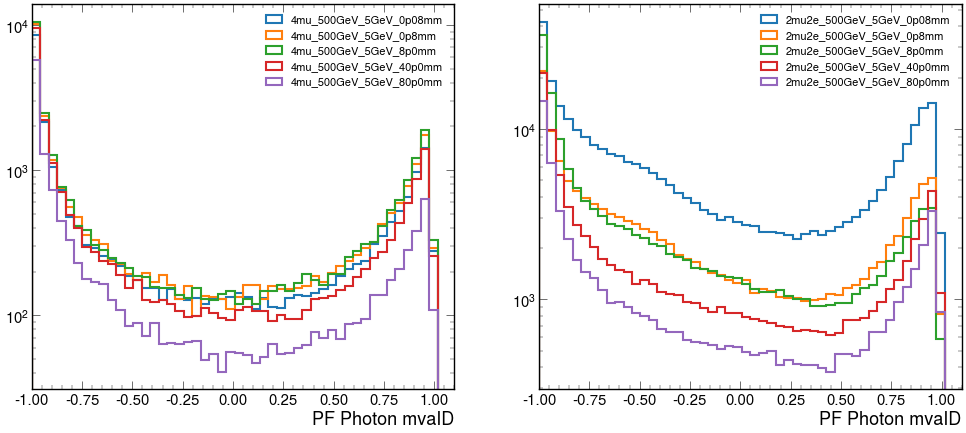

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mvaID", events_4mu[i_4mu].mvaID, events_2mu2e[i_2mu].mvaID)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mvaID), range=(-1,1.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mvaID), range=(-1,1.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1.1)
ax[1].set_xlim(-1,1.1)
ax[0].set_xlabel('PF Photon mvaID')
ax[1].set_xlabel('PF Photon mvaID')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/mvaID.png", bbox_inches="tight")

## mvaID_Fall17V1p1

4mu mvaID_Fall17V1p1 structure: [[], [], [], [], [], [], [], [], [], ... [], [-0.963], [], [], [], [], [], [], []]
2mu2e mvaID_Fall17V1p1 structure: [[-0.535, -0.549], [-0.983, -0.702], [-0.958, ... [-0.63, -0.939], [0.0078], [0.941]]
4mu mvaID_Fall17V1p1 structure: [[], [], [], [], [], [], [-0.638], [], ... [], [], [], [], [], [], [], [-0.822]]
2mu2e mvaID_Fall17V1p1 structure: [[-0.977, -0.914], [0.971, 0.491], [0.979, ... -0.984], [0.957], [0.867, -0.0935]]
4mu mvaID_Fall17V1p1 structure: [[], [], [], [], [], [], [], [], [], ... [0.667], [], [], [], [0.987], [], [], []]
2mu2e mvaID_Fall17V1p1 structure: [[-0.993, -0.946], [0.987, -0.769], [-0.557, ... -0.894], [-0.921, -0.988], [-0.301]]
4mu mvaID_Fall17V1p1 structure: [[], [0.978], [0.961, -0.413], [], [], [], ... [], [], [], [], [-0.989], [-0.956]]
2mu2e mvaID_Fall17V1p1 structure: [[-0.936], [-0.927], [], [], [], ... [-0.955, -0.816], [-0.921, -0.966], [-0.309]]
4mu mvaID_Fall17V1p1 structure: [[], [], [], [], [], [], [], [], [],

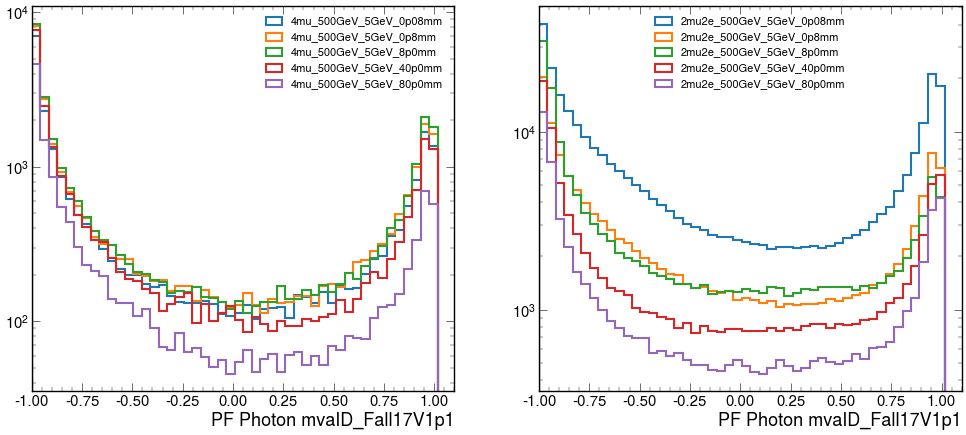

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mvaID_Fall17V1p1", events_4mu[i_4mu].mvaID_Fall17V1p1, events_2mu2e[i_2mu].mvaID_Fall17V1p1)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mvaID_Fall17V1p1), range=(-1,1.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mvaID_Fall17V1p1), range=(-1,1.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1,1.1)
ax[1].set_xlim(-1,1.1)
ax[0].set_xlabel('PF Photon mvaID_Fall17V1p1')
ax[1].set_xlabel('PF Photon mvaID_Fall17V1p1')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/mvaID_Fall17V1p1.png", bbox_inches="tight")

## cutBased

4mu cutBased structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [], []]
2mu2e cutBased structure: [[0, 0], [0, 0], [0], [3], [3, 0], [0], ... [3], [0], [0, 0], [0, 0], [3], [3]]
4mu cutBased structure: [[], [], [], [], [], [], [0], [], [], [], ... [], [], [], [], [], [], [], [], [0]]
2mu2e cutBased structure: [[0, 0], [3, 0], [3, 2], [3, 0], [3, 3], ... [0, 0], [2, 0], [0, 0], [3], [2, 1]]
4mu cutBased structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [0], [], [], []]
2mu2e cutBased structure: [[0, 0], [3, 0], [3], [0], [0, 0], [0, 0, ... [3, 0], [0, 0], [0, 0], [0, 0], [3]]
4mu cutBased structure: [[], [0], [0, 0], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [0], [0]]
2mu2e cutBased structure: [[0], [0], [], [], [], [], [0, 3], [], [3, ... [0], [0], [0, 0], [0, 0], [0, 0], [0]]
4mu cutBased structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [0], [], [], [], [], []]
2mu2e cutBased structure: [[], 

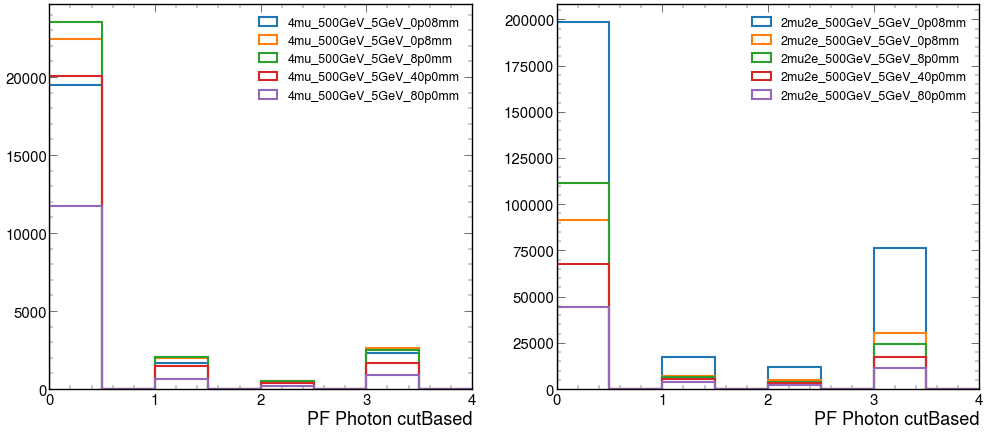

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("cutBased", events_4mu[i_4mu].cutBased, events_2mu2e[i_2mu].cutBased)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].cutBased), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].cutBased), range=(0,4), alpha=1, bins=8, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,4)
ax[1].set_xlim(0,4)
ax[0].set_xlabel('PF Photon cutBased')
ax[1].set_xlabel('PF Photon cutBased')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_xticks([0,1,2,3,4])
ax[1].set_xticks([0,1,2,3,4])

plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/cutBased.png", bbox_inches="tight")

## cutBased_Fall17V1Bitmap

4mu cutBased_Fall17V1Bitmap structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [], []]
2mu2e cutBased_Fall17V1Bitmap structure: [[0, 0], [0, 0], [0], [7], [7, 0], [0], ... [7], [0], [0, 0], [0, 0], [7], [7]]
4mu cutBased_Fall17V1Bitmap structure: [[], [], [], [], [], [], [0], [], [], [], ... [], [], [], [], [], [], [], [], [0]]
2mu2e cutBased_Fall17V1Bitmap structure: [[0, 0], [7, 0], [7, 7], [7, 0], [7, 7], ... [0, 0], [7, 0], [0, 0], [7], [7, 0]]
4mu cutBased_Fall17V1Bitmap structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [1], [], [], []]
2mu2e cutBased_Fall17V1Bitmap structure: [[0, 0], [7, 0], [7], [0], [0, 0], [0, 0, ... [7, 0], [0, 0], [0, 0], [0, 0], [7]]
4mu cutBased_Fall17V1Bitmap structure: [[], [1], [1, 0], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [0], [0]]
2mu2e cutBased_Fall17V1Bitmap structure: [[0], [0], [], [], [], [], [0, 7], [], [7, ... [0], [0], [0, 0], [0, 0], [0, 0], [0]]
4mu cutBased_Fall

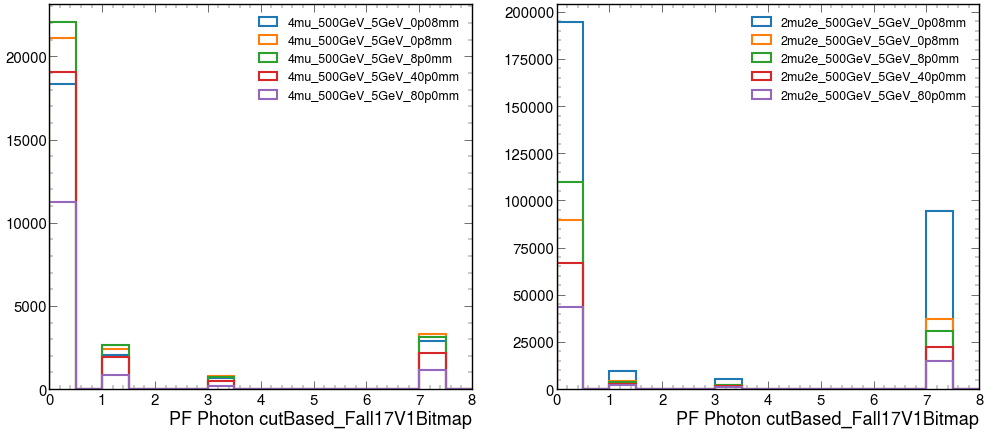

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("cutBased_Fall17V1Bitmap", events_4mu[i_4mu].cutBased_Fall17V1Bitmap, events_2mu2e[i_2mu].cutBased_Fall17V1Bitmap)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].cutBased_Fall17V1Bitmap), range=(0,8), alpha=1, bins=16, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].cutBased_Fall17V1Bitmap), range=(0,8), alpha=1, bins=16, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,8)
ax[1].set_xlim(0,8)
ax[0].set_xlabel('PF Photon cutBased_Fall17V1Bitmap')
ax[1].set_xlabel('PF Photon cutBased_Fall17V1Bitmap')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/cutBased_Fall17V1Bitmap.png", bbox_inches="tight")

## electronIdx

4mu electronIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [], [], [], []]
2mu2e electronIdx structure: [[0, 1], [0, 1], [0], [0], [0, 1], [0], ... [0], [0], [0, 1], [0, 1], [0], [0]]
4mu electronIdx structure: [[], [], [], [], [], [], [-1], [], [], ... [], [], [], [], [], [], [], [], [-1]]
2mu2e electronIdx structure: [[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], ... [0, -1], [0, 1], [0, -1], [0], [0, 1]]
4mu electronIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [-1], [], [], []]
2mu2e electronIdx structure: [[-1, -1], [-1, 0], [0], [-1], [0, 1], ... 0], [-1, -1], [-1, -1], [-1, -1], [-1]]
4mu electronIdx structure: [[], [-1], [-1, -1], [], [], [], [], [], ... [], [], [], [], [], [], [-1], [-1]]
2mu2e electronIdx structure: [[0], [-1], [], [], [], [], [-1, -1], ... [-1], [-1, -1], [0, -1], [-1, -1], [0]]
4mu electronIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [0], [], [], [], [], []]
2mu2e el

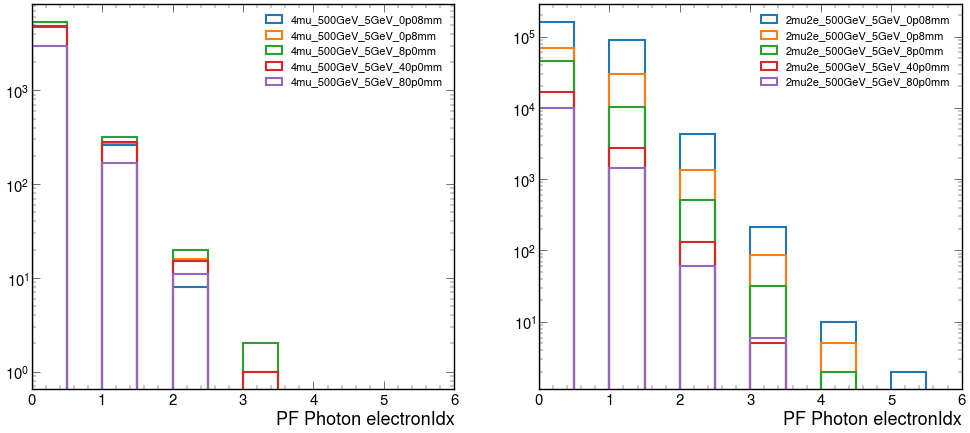

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("electronIdx", events_4mu[i_4mu].electronIdx, events_2mu2e[i_2mu].electronIdx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].electronIdx), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].electronIdx), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[0].set_xlabel('PF Photon electronIdx')
ax[1].set_xlabel('PF Photon electronIdx')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/electronIdx.png", bbox_inches="tight")

## pdgId

4mu pdgId structure: [[], [], [], [], [], [], [], [], [], [], ... [], [22], [], [], [], [], [], [], []]
2mu2e pdgId structure: [[22, 22], [22, 22], [22], [22], [22, 22], ... [22], [22, 22], [22, 22], [22], [22]]
4mu pdgId structure: [[], [], [], [], [], [], [22], [], [], ... [], [], [], [], [], [], [], [], [22]]
2mu2e pdgId structure: [[22, 22], [22, 22], [22, 22], [22, 22], ... [22, 22], [22, 22], [22], [22, 22]]
4mu pdgId structure: [[], [], [], [], [], [], [], [], [], [], ... [], [22], [], [], [], [22], [], [], []]
2mu2e pdgId structure: [[22, 22], [22, 22], [22], [22], [22, 22, ... [22, 22], [22, 22], [22, 22], [22]]
4mu pdgId structure: [[], [22], [22, 22], [], [], [], [], [], ... [], [], [], [], [], [], [22], [22]]
2mu2e pdgId structure: [[22], [22], [], [], [], [], [22, 22], ... [22], [22, 22], [22, 22], [22, 22], [22]]
4mu pdgId structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [22], [], [], [], [], []]
2mu2e pdgId structure: [[], [], [], [22, 22], [22], [22],

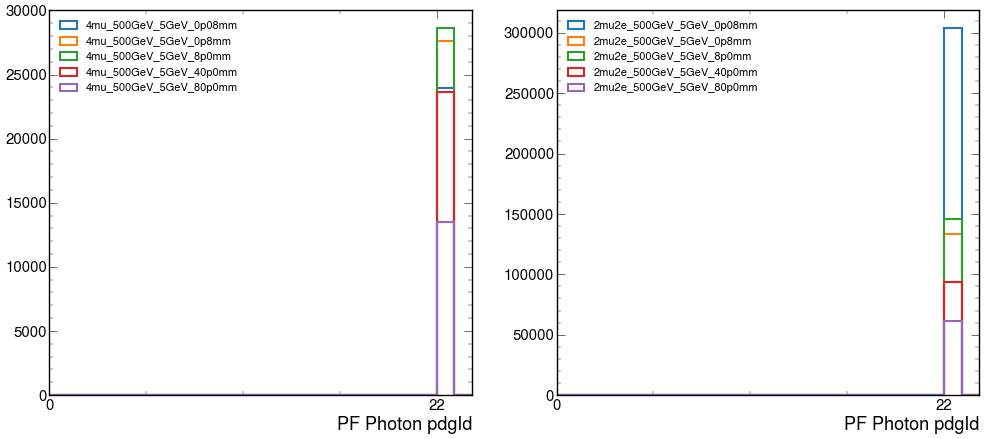

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pdgId", events_4mu[i_4mu].pdgId, events_2mu2e[i_2mu].pdgId)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pdgId), range=(0,24), alpha=1, bins=24, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pdgId), range=(0,24), alpha=1, bins=24, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,24)
ax[1].set_xlim(0,24)
ax[0].set_xlabel('PF Photon pdgId')
ax[1].set_xlabel('PF Photon pdgId')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,22])
ax[1].set_xticks([0,22])
plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/pdgId.png", bbox_inches="tight")

## genPartIdx

4mu genPartIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [], [], [], []]
2mu2e genPartIdx structure: [[-1, -1], [10, -1], [9], [12], [13, 11], ... [13], [-1, 10], [16, -1], [-1], [11]]
4mu genPartIdx structure: [[], [], [], [], [], [], [28], [], [], ... [], [], [], [], [], [], [], [], [-1]]
2mu2e genPartIdx structure: [[11, -1], [15, 13], [14, 13], [17, 15], ... 9], [15, 16], [8, 9], [14], [12, 10]]
4mu genPartIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-1], [], [], [], [-1], [], [], []]
2mu2e genPartIdx structure: [[9, -1], [13, 15], [-1], [8], [13, 33], ... 13], [-1, 15], [13, -1], [-1, -1], [11]]
4mu genPartIdx structure: [[], [11], [17, -1], [], [], [], [], [], ... [], [], [], [], [], [], [-1], [-1]]
2mu2e genPartIdx structure: [[-1], [-1], [], [], [], [], [11, 6], ... [-1], [19, 18], [14, 15], [13, -1], [13]]
4mu genPartIdx structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [-1], [], [], [], [], []]
2mu2e ge

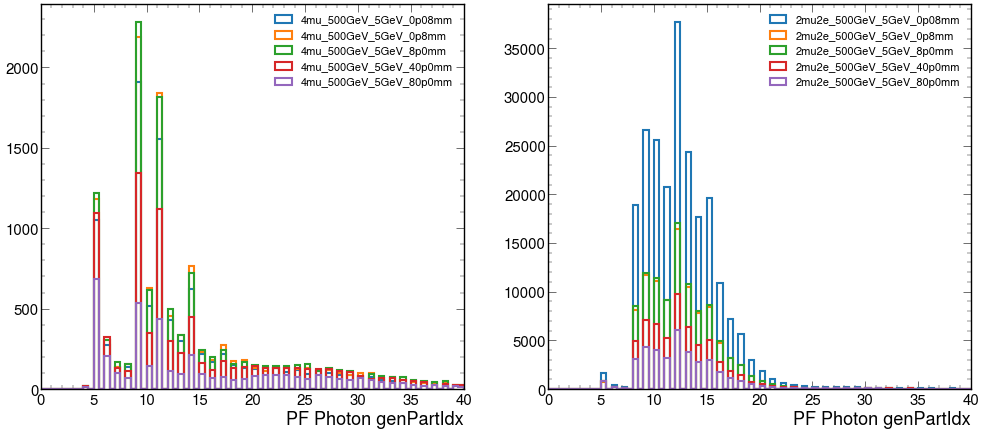

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("genPartIdx", events_4mu[i_4mu].genPartIdx, events_2mu2e[i_2mu].genPartIdx)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].genPartIdx), range=(0,40), alpha=1, bins=80, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].genPartIdx), range=(0,40), alpha=1, bins=80, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,40)
ax[1].set_xlim(0,40)
ax[0].set_xlabel('PF Photon genPartIdx')
ax[1].set_xlabel('PF Photon genPartIdx')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/genPartIdx.png", bbox_inches="tight")

## genPartFlav

4mu genPartFlav structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [], []]
2mu2e genPartFlav structure: [[0, 0], [11, 0], [11], [11], [11, 11], ... 0], [11], [0, 11], [11, 0], [0], [11]]
4mu genPartFlav structure: [[], [], [], [], [], [], [0], [], [], [], ... [], [], [], [], [], [], [], [], [0]]
2mu2e genPartFlav structure: [[11, 0], [11, 11], [11, 11], [11, 11], ... [11, 11], [11, 11], [11], [11, 11]]
4mu genPartFlav structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [0], [], [], []]
2mu2e genPartFlav structure: [[11, 0], [11, 11], [0], [11], [11, 0], ... 11, 11], [0, 11], [11, 0], [0, 0], [11]]
4mu genPartFlav structure: [[], [1], [1, 0], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [0], [0]]
2mu2e genPartFlav structure: [[0], [0], [], [], [], [], [11, 1], ... [0], [11, 11], [11, 11], [11, 0], [11]]
4mu genPartFlav structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [0], [], [], [], [], []]
2mu2e g

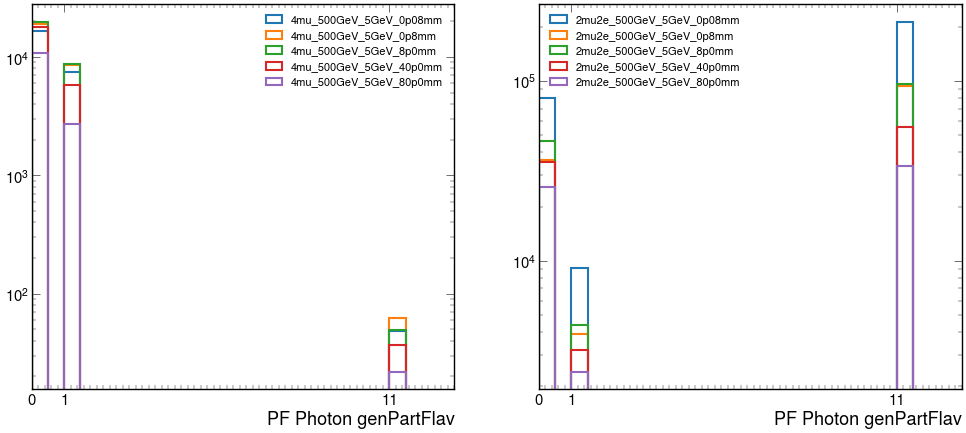

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("genPartFlav", events_4mu[i_4mu].genPartFlav, events_2mu2e[i_2mu].genPartFlav)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].genPartFlav), range=(0,13), alpha=1, bins=26, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].genPartFlav), range=(0,13), alpha=1, bins=26, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,13)
ax[1].set_xlim(0,13)
ax[0].set_xlabel('PF Photon genPartFlav')
ax[1].set_xlabel('PF Photon genPartFlav')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([0,1,11])
ax[1].set_xticks([0,1,11])
plt.savefig("../Plots/PF_PHOTON/Cutbased_ID/genPartFlav.png", bbox_inches="tight")